## Sample basic information

### 1. Import Raw Data 
(survey's answers tabular data)
#### Get shape, data types, nulls and columns (questions)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('./data/Distance_Learning_Data.xlsx')

In [3]:
df.shape

(4727, 237)

In [4]:
df.dtypes.head(20)

Date of data collection                                          object
Enumerator full name                                             object
State                                                            object
County                                                           object
Payam                                                            object
Does the location have radio coverage?                           object
School Type Level                                                object
School Category                                                  object
What is the School location                                      object
School                                                           object
School Name                                                      object
SAMS School Code                                                 object
Title                                                            object
Name                                                            

In [5]:
df.isnull().sum().head(20)

Date of data collection                                            0
Enumerator full name                                               0
State                                                              0
County                                                             0
Payam                                                              0
Does the location have radio coverage?                             0
School Type Level                                                804
School Category                                                  804
What is the School location                                      804
School                                                           804
School Name                                                     3841
SAMS School Code                                                1690
Title                                                            804
Name                                                             804
Gender                            

### 2. Basic categorical variables
Some of the columns/variables that describes the survey's target.

#### 2.a. Title

In [6]:
title = df.Title.value_counts()
title

Learner                    2510
Parent/guardian/sibling    1185
Teacher                     228
Name: Title, dtype: int64

#### 2.b. Age

In [7]:
age = pd.qcut(df.Age.dropna().astype('int32'), 4, labels =['5 - 15', '32 - 80', '18 - 32', '15 - 18']).value_counts()
age

5 - 15     1230
15 - 18     959
18 - 32     952
32 - 80     782
Name: Age, dtype: int64

#### 2.c. Gender

In [8]:
gender = df.loc[:,'Gender '].value_counts()
gender

Female    2031
Male      1892
Name: Gender , dtype: int64

#### 2.d. School Level

In [9]:
level = df.loc[:,'School Type Level'].dropna()
level[(level != 'Secondary') & (level != 'Primary')] = 'Other'

In [10]:
level.value_counts()

Primary      3271
Secondary     612
Other          40
Name: School Type Level, dtype: int64

Filtered by Age

In [11]:
# first 20 values
level_by_age = df.loc[df.loc[:,'School Type Level'] == 'Primary','Age'].value_counts()[:20]
level_by_age

15.0    322
14.0    259
16.0    258
13.0    225
17.0    207
18.0    176
12.0    159
19.0    102
20.0     86
Name: Age, dtype: int64

#### 2.d. Type of school by location

In [12]:
location = df.loc[:,'What is the School location'].value_counts()
location

Urban    2118
Rural    1805
Name: What is the School location, dtype: int64

Filtered by school level<br>
Primary

In [13]:
location_elementary = df.loc[df.loc[:,'School Type Level'] == 'Primary','What is the School location'].value_counts()
location_elementary

Rural    1655
Urban    1616
Name: What is the School location, dtype: int64

Secondary

In [14]:
location_high = df.loc[df.loc[:,'School Type Level'] == 'Secondary','What is the School location'].value_counts()
location_high

Urban    463
Rural    149
Name: What is the School location, dtype: int64

#### 2.e. School Category

In [15]:
df.loc[:,'School Category'].value_counts()

Non-IDP School    3469
IDP School         454
Name: School Category, dtype: int64

#### 2.f. State

In [16]:
df.State.value_counts()

Western Equatoria          712
Central Equatoria          703
Unity                      702
Eastern Equatoria          651
Western Bahr el Ghazal     582
Northern Bahr el Ghazal    415
Lakes                      373
Warrap                     281
Upper Nile State           192
Jonglei                    116
Name: State, dtype: int64

### 3. Save variables

In [17]:
data = df[['Gender ','Age','Title','School Type Level','What is the School location','School Category','State']]

In [18]:
data.isnull().sum() / data.notnull().sum() 

Gender                         0.204945
Age                            0.204945
Title                          0.204945
School Type Level              0.204945
What is the School location    0.204945
School Category                0.204945
State                          0.000000
dtype: float64

In [19]:
data.to_csv('data/desc_data.csv', index=False)

### 4. See variables

In [20]:
import matplotlib.pyplot as plt

In [21]:
data = {
    'Gender': gender,
    'Role': title,
    'Top Age': age,
    'Location': location,
    'Location Elementary': location_elementary,
    'Location High': location_high,
    'Level': level.value_counts(),    
}

In [22]:
data

{'Gender': Female    2031
 Male      1892
 Name: Gender , dtype: int64,
 'Role': Learner                    2510
 Parent/guardian/sibling    1185
 Teacher                     228
 Name: Title, dtype: int64,
 'Top Age': 5 - 15     1230
 15 - 18     959
 18 - 32     952
 32 - 80     782
 Name: Age, dtype: int64,
 'Location': Urban    2118
 Rural    1805
 Name: What is the School location, dtype: int64,
 'Location Elementary': Rural    1655
 Urban    1616
 Name: What is the School location, dtype: int64,
 'Location High': Urban    463
 Rural    149
 Name: What is the School location, dtype: int64,
 'Level': Primary      3271
 Secondary     612
 Other          40
 Name: School Type Level, dtype: int64}

In [23]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

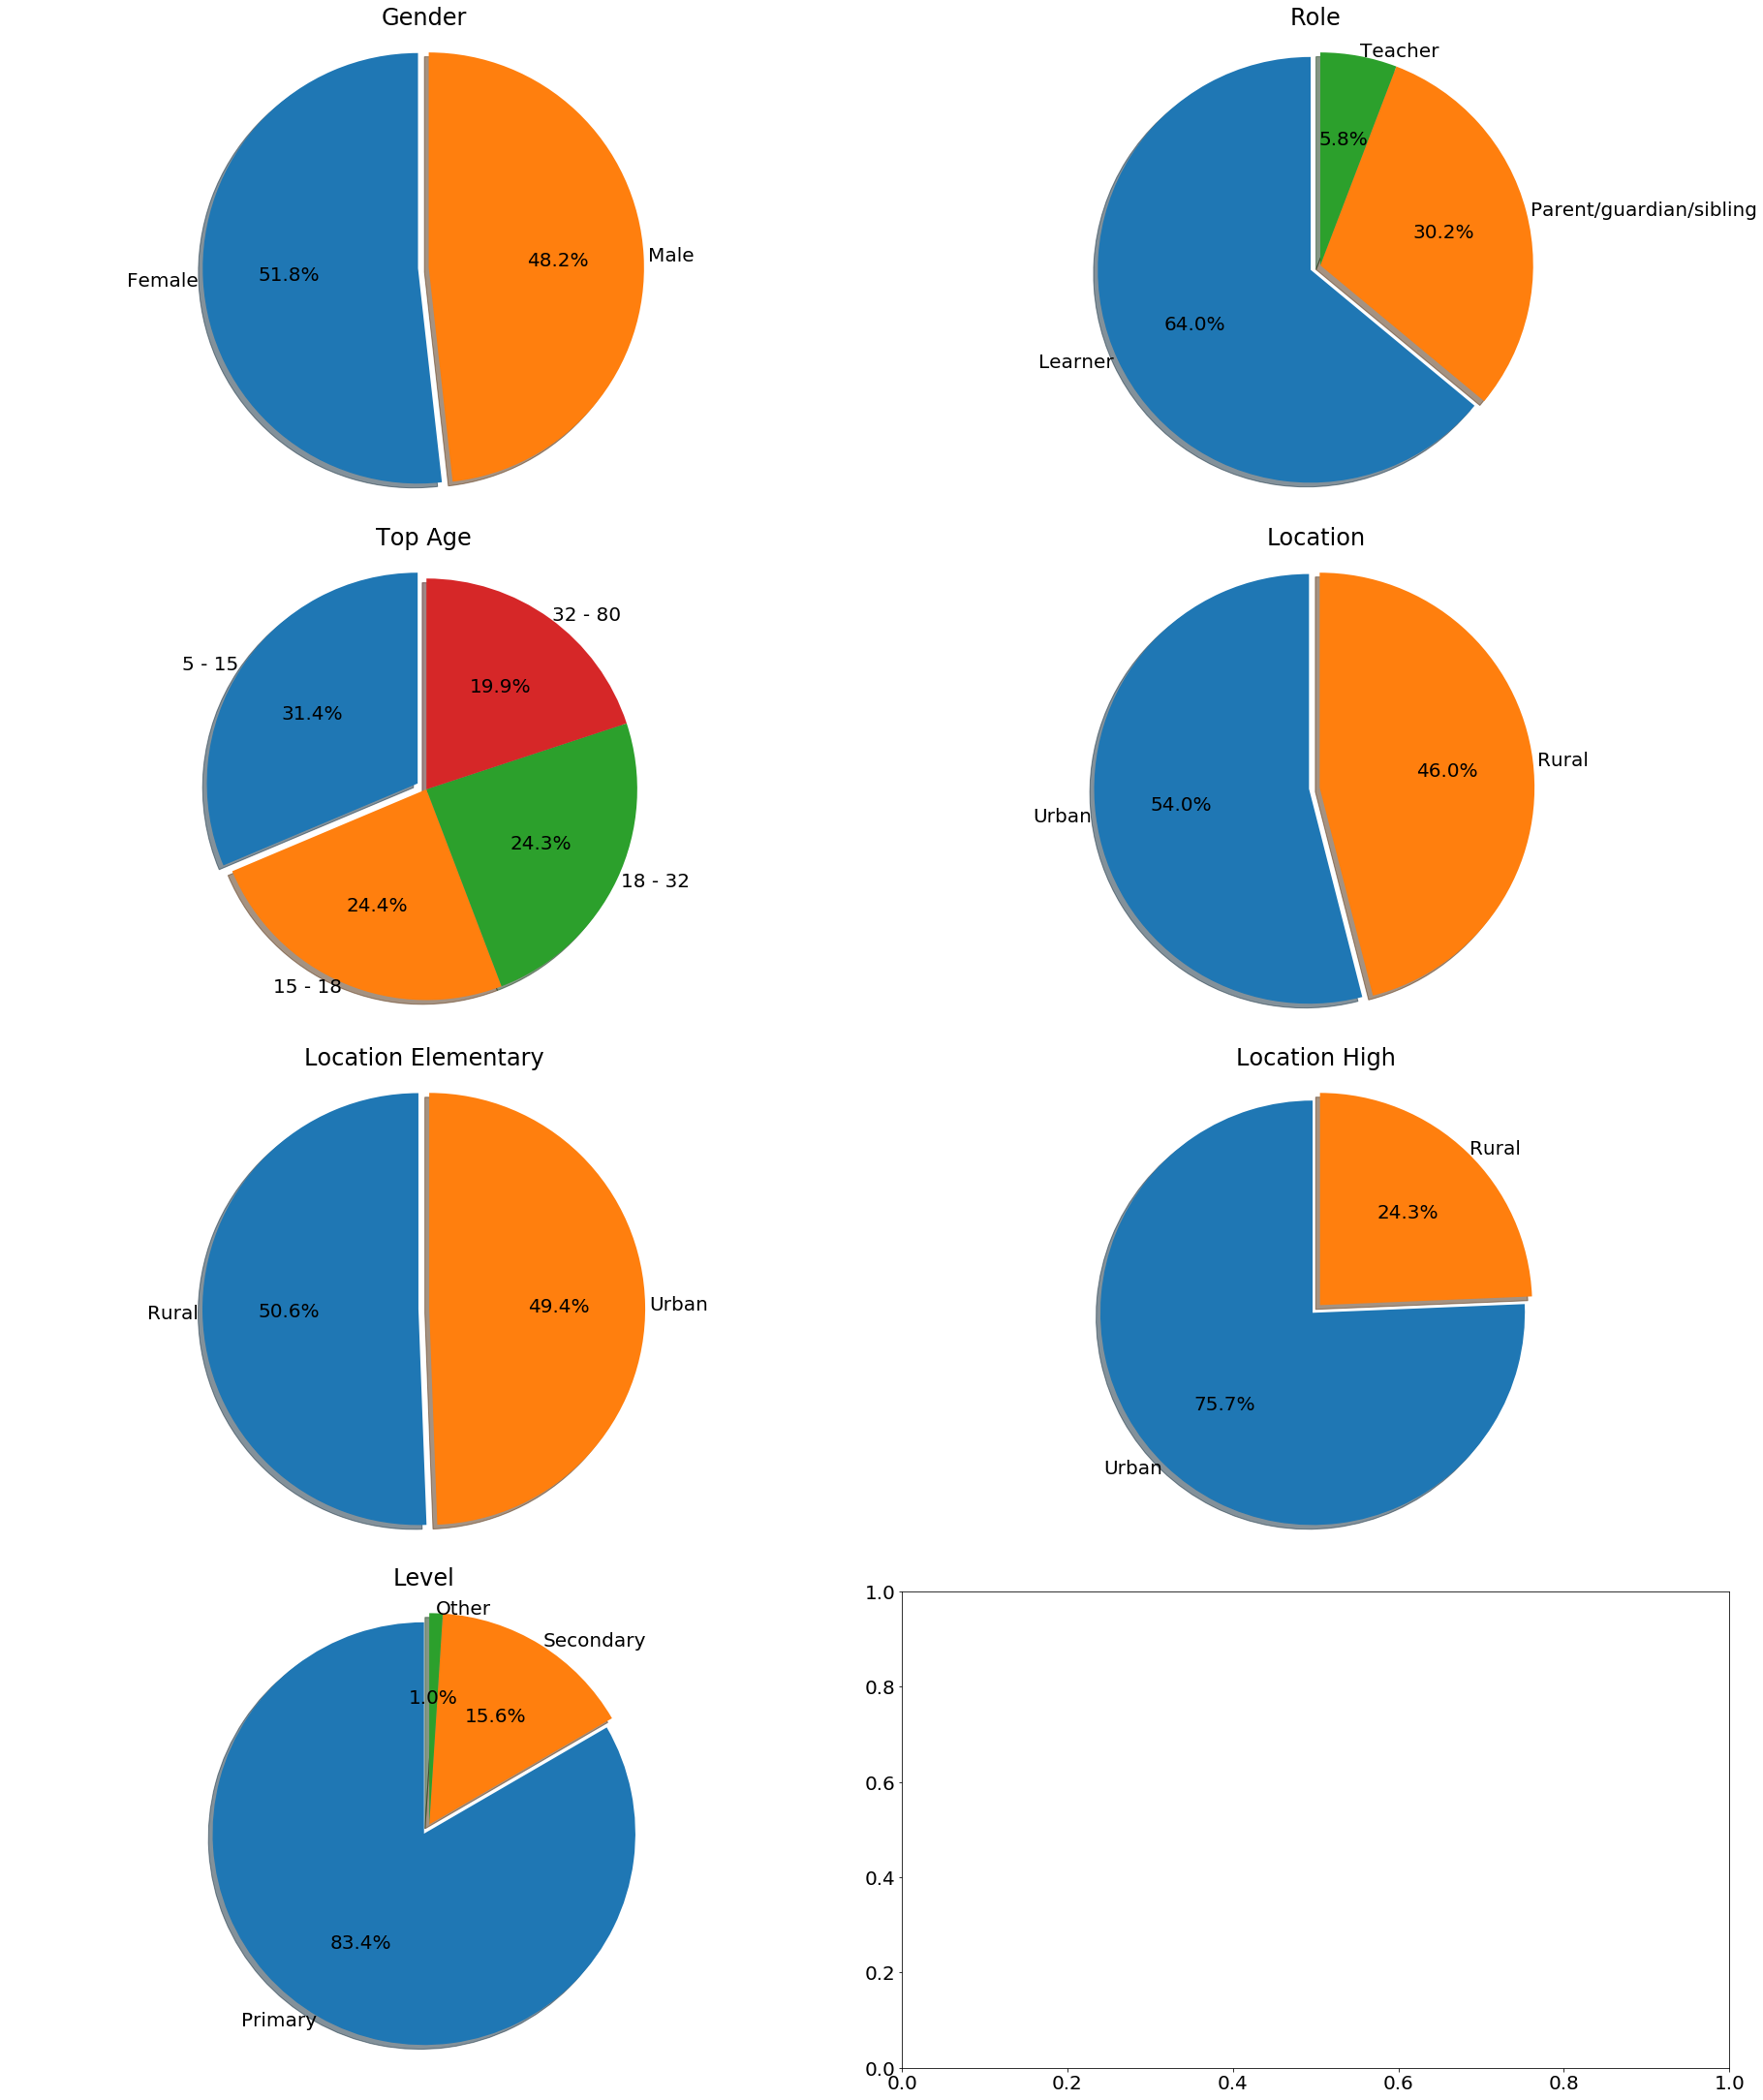

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(25,30))

for shape, ax, name in zip(data.items(), axes.flatten(), data.keys()):
    pieces = np.zeros(shape[1].count()).astype('int32').tolist()
    pieces[0] = 0.05
    ax.pie(shape[1].values, 
           labels=(shape[1].index), 
           autopct='%1.1f%%', 
           shadow=True, 
           startangle=90, 
           explode = pieces,
           labeldistance=1.02)
    ax.set_title(name)
    ax.axis('equal')

plt.savefig('cat_basic_var.png')
plt.show()